# EXON STATS TABLE

In [1]:
from suffix_trees import STree
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import time

In [2]:
def exon_pos_table(pos, color):
    # prints the stats(starting postion, ending position, length, previous exon distance)
    # for each exon coordinates in the pos list

    # Parameters:
    # pos: pos[i][0] = strating coordinate, pos[i][1] = ending coordinate for the ith exon
    # color: type of exon i.e red, green

    t = PrettyTable(['EXON NUMBER', 'STARTING POSITION', 'ENDING POSITION', 'LENGTH', 'PREVIOUS EXON DISTANCE'])

    n = len(pos)
    total_len = 0
    total_dis = 0
    for i in range(len(pos)):
        if i == 0:
            t.add_row([i + 1, pos[i][0], pos[i][1], pos[i][1] - pos[i][0] + 1, '-'])
        else:
            t.add_row([i + 1, pos[i][0], pos[i][1], pos[i][1] - pos[i][0] + 1, pos[i][0] - pos[i - 1][1] + 1])
            total_dis += pos[i][0] - pos[i - 1][1]

        total_len += pos[i][1] - pos[i][0]

    print(f"for {color} exon:")
    print(t)
    print(f"average {color} exon length: {total_len/n}")
    print(f"average distance between 2 consecutive {color} exon: {total_dis/(n - 1)}")

In [ ]:
# red and green exon pos coordinates in the refrence chrX
red_exons_pos = [   [149249757, 149249868], 
                    [149256127, 149256423],
                    [149258412, 149258580],
                    [149260048, 149260213],
                    [149261768, 149262007],
                    [149264290, 149264400]
                ]

gree_exons_pos = [
                    [149288166, 149288277],
                    [149293258, 149293554],
                    [149295542, 149295710],
                    [149297178, 149297343],
                    [149298898, 149299137],
                    [149301420, 149301530]
                ]

In [4]:
exon_pos_table(red_exons_pos, "red")

for red exon:
+-------------+-------------------+-----------------+--------+------------------------+
| EXON NUMBER | STARTING POSITION | ENDING POSITION | LENGTH | PREVIOUS EXON DISTANCE |
+-------------+-------------------+-----------------+--------+------------------------+
|      1      |     149249757     |    149249868    |  112   |           -            |
|      2      |     149256127     |    149256423    |  297   |          6260          |
|      3      |     149258412     |    149258580    |  169   |          1990          |
|      4      |     149260048     |    149260213    |  166   |          1469          |
|      5      |     149261768     |    149262007    |  240   |          1556          |
|      6      |     149264290     |    149264400    |  111   |          2284          |
+-------------+-------------------+-----------------+--------+------------------------+
average red exon length: 181.5
average distance between 2 consecutive red exon: 2710.8


In [5]:
exon_pos_table(gree_exons_pos, "green")

for green exon:
+-------------+-------------------+-----------------+--------+------------------------+
| EXON NUMBER | STARTING POSITION | ENDING POSITION | LENGTH | PREVIOUS EXON DISTANCE |
+-------------+-------------------+-----------------+--------+------------------------+
|      1      |     149288166     |    149288277    |  112   |           -            |
|      2      |     149293258     |    149293554    |  297   |          4982          |
|      3      |     149295542     |    149295710    |  169   |          1989          |
|      4      |     149297178     |    149297343    |  166   |          1469          |
|      5      |     149298898     |    149299137    |  240   |          1556          |
|      6      |     149301420     |    149301530    |  111   |          2284          |
+-------------+-------------------+-----------------+--------+------------------------+
average green exon length: 181.5
average distance between 2 consecutive green exon: 2455.0


Extracting red & green exon region from the X-chromosome

In [6]:
file = open('./chrX.fa') 
lines = file.readlines()
file.close()

ref_str = ""
for i in range(1, len(lines)):
    lines[i] = lines[i][:-1]
    ref_str += lines[i]

ref_str = ref_str[149249657:149301631] #extracting only the red & green exon region from the chrX with the added padding
print(len(ref_str))

51974


# MATCHING READS USING SUFFIX TREE

In [7]:
def suffix_tree_matching(file_name, ref_str):
    # prints how many times, how many reads matches in the red-green exon region
    # by using in-built suffix_trees library
    # and plots the time taken v/s reads length plot

    # Parameters:
    # file_name: name of the file which contains the reads
    # ref_str: extracted red-green exon region string

    st = STree.STree(ref_str)

    file = open('./' + file_name)
    lines = file.readlines()
    file.close()

    t = [] #time
    l = [] #read length
    c = [] #color: red = not-matched, green: matched
    matches = 0
    n = len(lines)

    for i in range(n):
        read = lines[i][:-1]

        start = time.time()
        flag = st.find(read)
        end = time.time()

        l.append(len(read))
        t.append((end - start)*1E6)

        if flag != -1:
            matches += 1
            c.append("green")
        else:
            c.append("red")

    plt.scatter(l, t, color = c, linewidths=0.5) #plotting time taken v/s read length 
    plt.title("Time taken v/s Reads length")
    plt.xlabel("Reads length")
    plt.ylabel("Time taken (in micro seconds)")
    plt.show()

    print(f"Number of reads match: {matches} ({round((matches/n)*100, 2)}%)")
    print(f"Number of reads mis-match: {n - matches} ({round(((n - matches)/n)*100,2)})")

In [8]:
def suffix_tree_matching_all(file_name, ref_str):
    # prints how many times, how many reads matches in the red-green exon region
    # by using in-built suffix_trees library
    # and plots the time taken v/s reads length plot
    # also plots the number of matches v/s read lenght plot

    # Parameters:
    # file_name: name of the file which contains the reads
    # ref_str: extracted red-green exon region string

    st = STree.STree(ref_str)

    file = open('./' + file_name)
    lines = file.readlines()
    file.close()

    t = [] #time
    l = [] #length
    c = [] #color: red: 0 match, green: 1 match, blue: 1+ match
    m = [] #match count
    dict = {}
    n = len(lines)

    for i in range(n):
        read = lines[i][:-1]

        start = time.time()
        pos = st.find_all(read)
        end = time.time()

        l.append(len(read))
        t.append((end - start)*1E6)
        m.append(len(pos))

        lp = len(pos)
        if lp == 0:
            c.append("red")
        elif lp == 1:
            c.append("green")
        elif lp > 1:
            c.append("blue")

        if lp not in dict:
            dict[lp] = 1
        else:
            dict[lp] += 1

    fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True) #plotting time taken v/s reads length plot
    ax[0].scatter(l, t, color = c, linewidths=0.5)
    ax[0].set_title("Time taken v/s Reads length")
    ax[0].set_xlabel("Reads length")
    ax[0].set_ylabel("Time taken (in micro seconds)")

    ax[1].scatter(l, m, color = c, linewidths=0.5) #plotting number of matches v/s reads length plot
    ax[1].set_title("Number of matches v/s Reads length")
    ax[1].set_xlabel("Reads length")
    ax[1].set_ylabel("Number of Matches")
    fig.suptitle("stacked plots for find all function")
    plt.show()

    for key in dict:
        print(f"Number of reads that matched {key} times: {dict[key]} ({round((dict[key]/n)*100, 2)}%)")

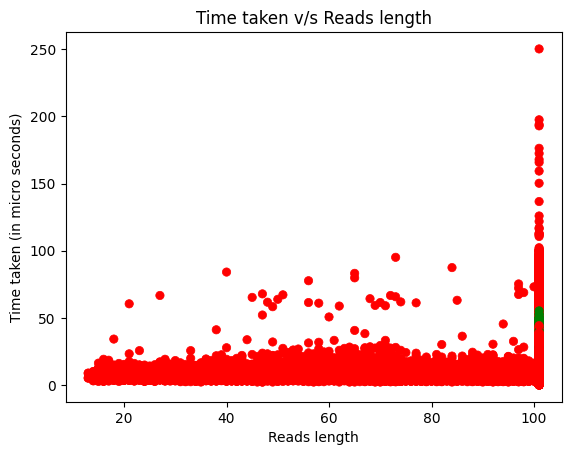

Number of reads match: 6867 (0.22%)
Number of reads mis-match: 3059853 (99.78)


In [9]:
suffix_tree_matching("reads", ref_str)

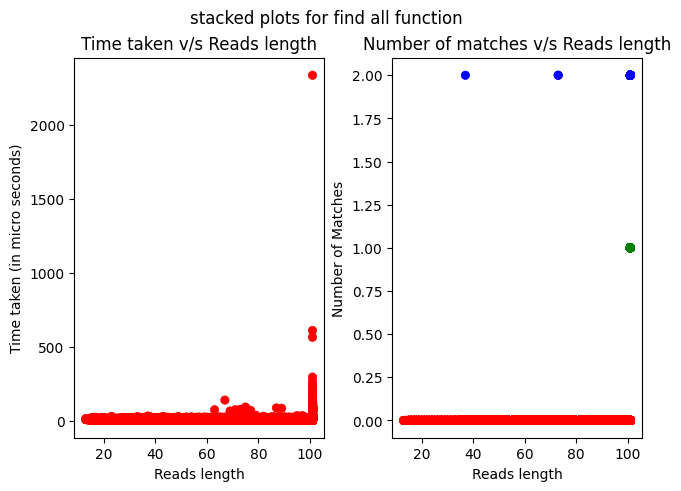

Number of reads that matched 0 times: 3059853 (99.78%)
Number of reads that matched 2 times: 1729 (0.06%)
Number of reads that matched 1 times: 5138 (0.17%)


In [10]:
suffix_tree_matching_all("reads", ref_str)